In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
DATA_PATH = 'data/transactions_dataset.csv'
df = pd.read_csv(DATA_PATH, sep=';')

df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [3]:
df.tail()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015
63319314,2019-09-10,2020-10-20,669067,1030337,-5.49240,3,at the store,9136


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.8+ GB


In [5]:
df.describe()

,product_id,client_id,sales_net,quantity,branch_id
count,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07
mean,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,5.466714e+03
std,9.184524e+05,6.552536e+05,8.646548e+02,8.674801e+02,3.175258e+03
min,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,2.000000e+01
25%,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,2.907000e+03
50%,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,5.226000e+03
75%,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,8.361000e+03
max,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,1.105700e+04


In [6]:
missing_data = df.isnull().sum()

print("Missing values per column:\n", missing_data)

Missing values per column:
 date_order       0
date_invoice     1
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64


In [7]:
# Convert 'date_order' and 'date_invoice' to datetime
df['date_order'] = pd.to_datetime(df['date_order'])
df['date_invoice'] = pd.to_datetime(df['date_invoice'])

In [8]:
# Fill missing values in 'date_invoice' with values from 'date_order'
df['date_invoice'].fillna(df['date_order'], inplace=True)

missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

<ipython-input-8-6ec6a889cfa5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_invoice'].fillna(df['date_order'], inplace=True)


Missing values per column:
 date_order       0
date_invoice     0
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64


In [9]:
# Extract year from 'date_order' for grouping and analysis
df['year'] = df['date_order'].dt.year
df['month'] = df['date_order'].dt.month
df['day'] = df['date_order'].dt.day

In [10]:
print('number of clients in the dataset', len(df['client_id'].unique()))
print('number of stores in the dataset', len(df['branch_id'].unique()))
print('number of type of products in the dataset', len(df['product_id'].unique()))
print('number of channel types in the dataset', len(df['order_channel'].unique()))
print('number of transactions in the dataset', len(df))

number of clients in the dataset 170589
number of stores in the dataset 582
number of type of products in the dataset 607418
number of channel types in the dataset 5
number of transactions in the dataset 63319315


In [11]:
df['order_channel'].unique()

array(['online', 'at the store', 'by phone',
       'during the visit of a sales rep', 'other'], dtype=object)

In [12]:
churn_df = pd.read_csv('client_churn_risk_ranking.csv')

churn_df.head()

,client_id,churn_probability
0,653029,0.999995
1,118276,0.999995
2,1202467,0.999995
3,903162,0.999995
4,123016,0.999995


In [13]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120743 entries, 0 to 120742
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   client_id          120743 non-null  int64  
 1   churn_probability  120743 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [14]:
churn_df.describe()

,client_id,churn_probability
count,1.207430e+05,1.207430e+05
mean,1.139098e+06,1.067523e-01
std,6.562874e+05,3.087669e-01
min,1.400000e+01,9.949855e-11
25%,5.713345e+05,1.385520e-07
50%,1.140485e+06,3.053105e-06
75%,1.709272e+06,4.338673e-06
max,2.274517e+06,9.999951e-01


## Churn predictions EDA

In [15]:
# Merge the datasets on client_id using an inner join
df_merged = pd.merge(df, churn_df, on='client_id', how='inner')

# Aggregate transaction data per client
df_client_level = df_merged.groupby('client_id').agg({
    'sales_net': 'sum',
    'quantity': 'sum',
    'churn_probability': 'mean'
}).reset_index()

df_client_level.head()

,client_id,sales_net,quantity,churn_probability
0,14,3.103187e+06,1392564,9.998466e-01
1,18,2.194882e+05,72612,2.059252e-07
2,37,6.591136e+03,1625,4.580603e-06
3,40,3.339621e+04,3354,4.121824e-08
4,55,4.098117e+03,821,3.053105e-06


In [16]:
df_client_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120743 entries, 0 to 120742
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   client_id          120743 non-null  int64  
 1   sales_net          120743 non-null  float64
 2   quantity           120743 non-null  int64  
 3   churn_probability  120743 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.7 MB


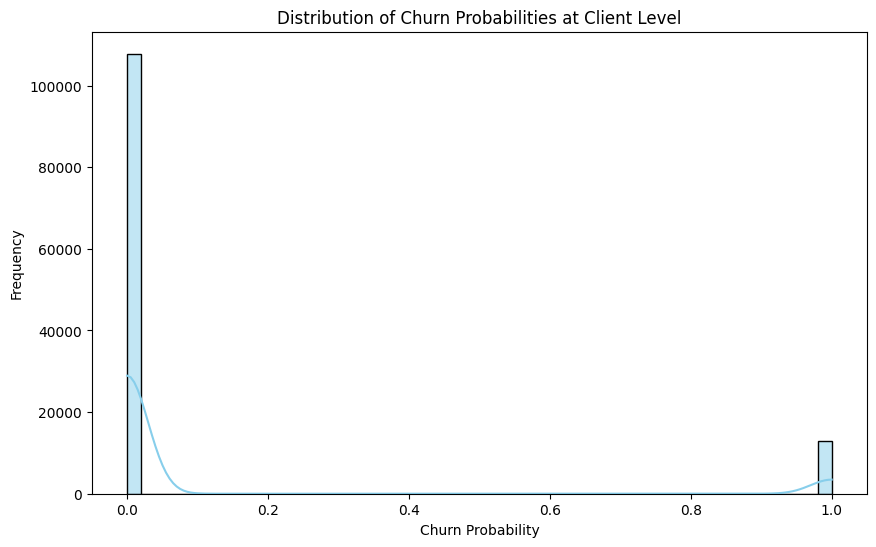

In [17]:
# Visualize the distribution of churn probabilities
plt.figure(figsize=(10, 6))
sns.histplot(df_client_level['churn_probability'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Churn Probabilities at Client Level')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

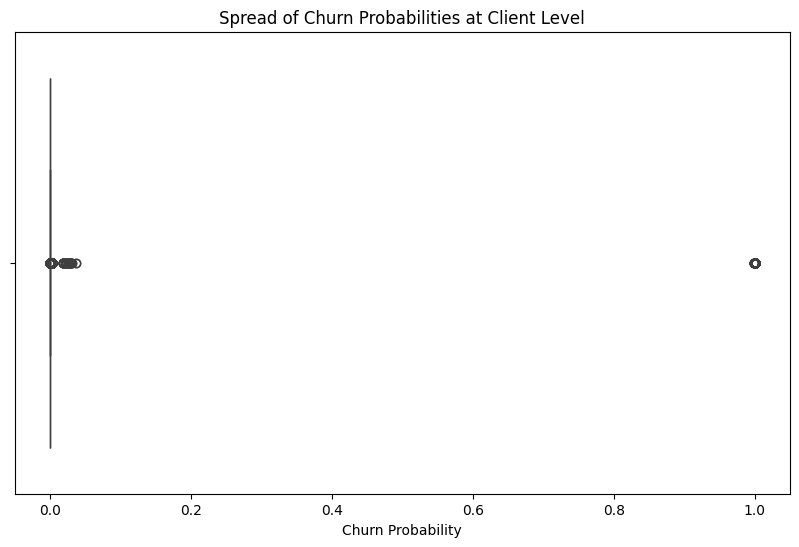

In [18]:
# Boxplot to visualize the spread of churn probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_client_level['churn_probability'])
plt.title('Spread of Churn Probabilities at Client Level')
plt.xlabel('Churn Probability')
plt.show()

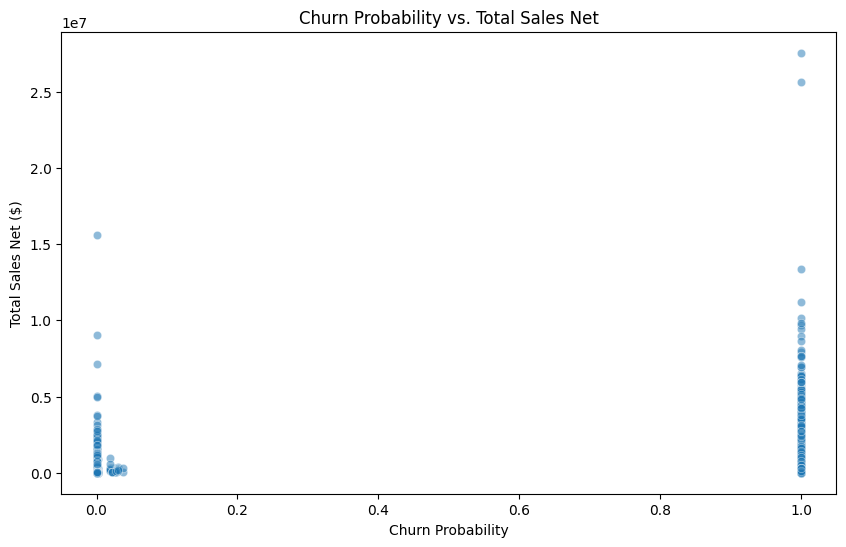

In [19]:
# Explore relationships: Churn Probability vs. Total Sales Net
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_client_level, x='churn_probability', y='sales_net', alpha=0.5)
plt.title('Churn Probability vs. Total Sales Net')
plt.xlabel('Churn Probability')
plt.ylabel('Total Sales Net ($)')
plt.show()

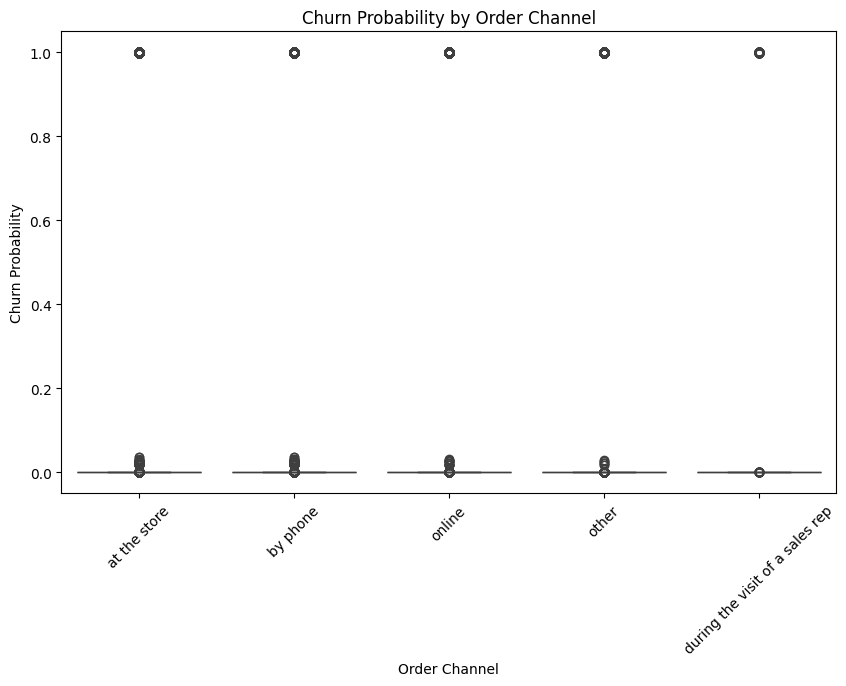

In [20]:
# Churn Probability by Order Channel 
order_channel_churn = df_merged.groupby(['client_id', 'order_channel']).agg({
    'churn_probability': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='order_channel', y='churn_probability', data=order_channel_churn)
plt.title('Churn Probability by Order Channel')
plt.xlabel('Order Channel')
plt.ylabel('Churn Probability')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x700 with 0 Axes>

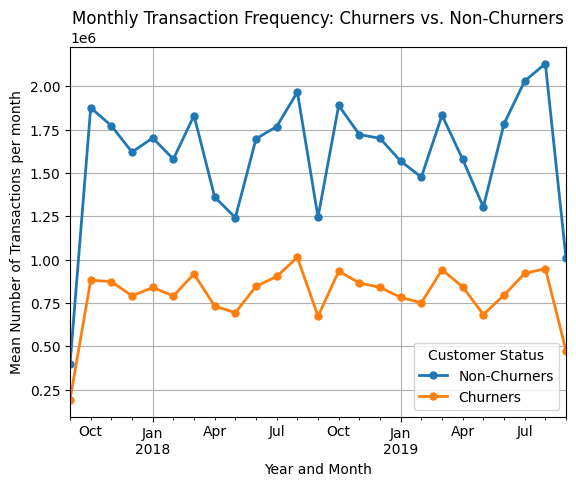

In [21]:
# Categorize customers based on churn probability
df_merged['churn_status'] = (df_merged['churn_probability'] > 0.5).astype(int)  # 1 for churners, 0 for non-churners

# Ensure 'date_order' is in correct format
df_merged['date_order'] = pd.to_datetime(df_merged['date_order'])

# Group by month, year, and churn status to count transactions
df_merged['year_month'] = df_merged['date_order'].dt.to_period('M')
transaction_freq = df_merged.groupby(['year_month', 'churn_status']).size().unstack(fill_value=0)

# Visualization of transaction frequency over time
transaction_freq.columns = ['Non-Churners', 'Churners']
plt.figure(figsize=(14, 7))
transaction_freq.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Transaction Frequency: Churners vs. Non-Churners')
plt.xlabel('Year and Month')
plt.ylabel('Mean Number of Transactions per month')
plt.grid(True)
plt.legend(title='Customer Status')
plt.show()


## Creating a priority score

For each client :
Priority score = expectency of shortfall = p(churn) * mean monthly spent

In [22]:
# Load the sales-client relationship dataset
relationship_df = pd.read_csv('sales_client_relationship_dataset.csv')
data = pd.merge(df_client_level, relationship_df, on='client_id', how='inner')

# Ensure all dataframes are correctly aligned by client_id
data = data[data['client_id'].isin(churn_df['client_id'])]

data.head()

,client_id,sales_net,quantity,churn_probability,quali_relation
0,14,3.103187e+06,1392564,9.998466e-01,Agreeable client
1,18,2.194882e+05,72612,2.059252e-07,Agreeable client
2,37,6.591136e+03,1625,4.580603e-06,Difficult client
3,40,3.339621e+04,3354,4.121824e-08,Difficult client
4,55,4.098117e+03,821,3.053105e-06,Agreeable client


In [23]:
# Calculate the mean spent per month (you might need to adjust based on actual data structure)
df['month_year'] = df['date_order'].dt.to_period('M')
monthly_spending = df.groupby(['client_id', 'month_year'])['sales_net'].sum().groupby('client_id').mean()
data = data.merge(monthly_spending.rename('mean_monthly_spent'), on='client_id')

In [24]:
data['expected_shortfall'] = data['churn_probability'] * data['mean_monthly_spent']

In [25]:
data.head()

,client_id,sales_net,quantity,churn_probability,quali_relation,mean_monthly_spent,expected_shortfall
0,14,3.103187e+06,1392564,9.998466e-01,Agreeable client,124127.475172,124108.434017
1,18,2.194882e+05,72612,2.059252e-07,Agreeable client,8779.526824,0.001808
2,37,6.591136e+03,1625,4.580603e-06,Difficult client,941.590888,0.004313
3,40,3.339621e+04,3354,4.121824e-08,Difficult client,1452.008970,0.000060
4,55,4.098117e+03,821,3.053105e-06,Agreeable client,2049.058742,0.006256


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120743 entries, 0 to 120742
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   client_id           120743 non-null  int64  
 1   sales_net           120743 non-null  float64
 2   quantity            120743 non-null  int64  
 3   churn_probability   120743 non-null  float64
 4   quali_relation      120743 non-null  object 
 5   mean_monthly_spent  120743 non-null  float64
 6   expected_shortfall  120743 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.4+ MB


In [27]:
# Descriptive statistics
print("Descriptive Statistics for Expected Shortfall:")
print(data['expected_shortfall'].describe())

Descriptive Statistics for Expected Shortfall:
count    1.207430e+05
mean     1.093799e+03
std      1.044468e+04
min     -1.230729e+02
25%      2.570722e-04
50%      1.554019e-03
75%      5.382892e-03
max      1.102231e+06
Name: expected_shortfall, dtype: float64


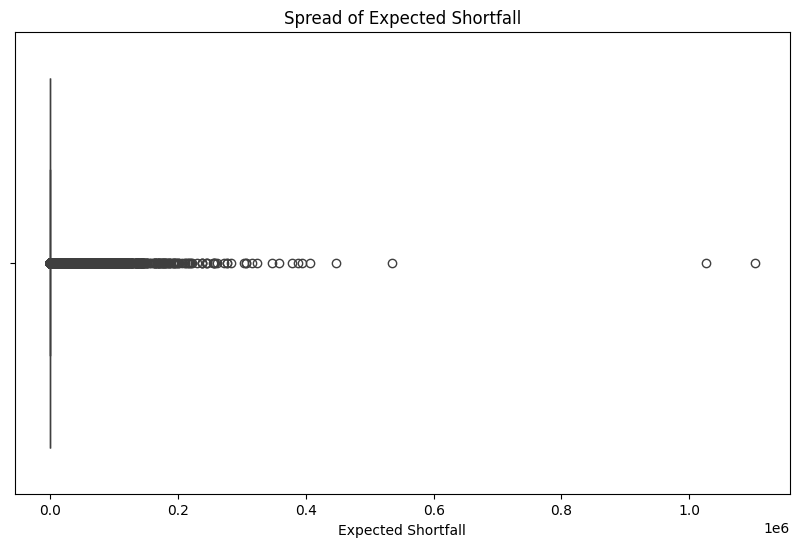

In [28]:
# Boxplot to see the spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['expected_shortfall'])
plt.title('Spread of Expected Shortfall')
plt.xlabel('Expected Shortfall')
plt.show()

## Optimizing the reach strategy of churners
Budget = 100k

In [29]:
# Define costs and conversion rates
def get_costs_and_conversion(row):
    email_cost = 1
    phone_cost = 20
    if row['quali_relation'] == 'Difficult client':
        return email_cost, 0.02, phone_cost, 0.45
    elif row['quali_relation'] == 'Demanding client':
        return email_cost, 0.05, phone_cost, 0.50
    elif row['quali_relation'] == 'Agreeable client':
        return email_cost, 0.08, phone_cost, 0.55

data[['cost_of_email', 'conversion_email', 'cost_of_phone', 'conversion_phone']] = data.apply(
    lambda row: pd.Series(get_costs_and_conversion(row)), axis=1)

In [30]:
data.head()

,client_id,sales_net,quantity,churn_probability,quali_relation,mean_monthly_spent,expected_shortfall,cost_of_email,conversion_email,cost_of_phone,conversion_phone
0,14,3.103187e+06,1392564,9.998466e-01,Agreeable client,124127.475172,124108.434017,1.0,0.08,20.0,0.55
1,18,2.194882e+05,72612,2.059252e-07,Agreeable client,8779.526824,0.001808,1.0,0.08,20.0,0.55
2,37,6.591136e+03,1625,4.580603e-06,Difficult client,941.590888,0.004313,1.0,0.02,20.0,0.45
3,40,3.339621e+04,3354,4.121824e-08,Difficult client,1452.008970,0.000060,1.0,0.02,20.0,0.45
4,55,4.098117e+03,821,3.053105e-06,Agreeable client,2049.058742,0.006256,1.0,0.08,20.0,0.55


In [31]:
def calculate_total_impact(num_contacts, base_conversion, cost_per_contact, expected_shortfall, method):
    """ Calculate total impact with diminishing returns based on the expected shortfall """
    impact = 0
    cr = 0
    for i in range(1, num_contacts + 1):
        cr += min(base_conversion / i, 1) # New reach impact diminishes with each additional contact
    if num_contacts >= 3 and method == 'mail': # Model fatigue with negative penalties for increasing number of contacts
        cr -= num_contacts * 0.15
    impact = max(cr, 0) * expected_shortfall
    return impact, num_contacts * cost_per_contact

def optimize_contact_strategy(df, budget):
    """ Optimize the contact strategy within the given budget, factoring in expected shortfall """
    # Sort by expected shortfall to prioritize clients with potentially higher revenue impacts
    df = df.sort_values(by='expected_shortfall', ascending=False)

    results = []
    for index, row in df.iterrows():
        best_gain = -1
        best_method = None
        best_cost = 0
        # Test different combinations of emails and phone calls
        for emails in range(4):  # Up to 3 emails
            for calls in range(3):  # Up to 2 phone calls
                email_gain, email_cost = calculate_total_impact(emails, row['conversion_email'], row['cost_of_email'], row['expected_shortfall'], method='mail')
                phone_gain, phone_cost = calculate_total_impact(calls, row['conversion_phone'], row['cost_of_phone'], row['expected_shortfall'], method='phone')
                total_gain = email_gain + phone_gain
                total_cost = email_cost + phone_cost
                if total_cost <= budget and total_gain > best_gain:
                    best_gain = total_gain
                    best_method = {'emails': emails, 'calls': calls}
                    best_cost = total_cost
        if best_method and best_cost != 0:
            results.append({'client_id': row['client_id'], 'method': best_method, 'cost': best_cost, 'gain': best_gain})
            budget -= best_cost  # Deduct the cost of the selected strategy from the budget
        if budget <= 0:
            break  # Stop if the budget is depleted

    return pd.DataFrame(results)

# Example usage
optimized_strategies = optimize_contact_strategy(data, 100000)
print(optimized_strategies)


      client_id                     method  cost           gain
0        417576  {'emails': 2, 'calls': 2}  42.0  777072.542128
1       1773169  {'emails': 2, 'calls': 2}  42.0  723529.946195
2       1552980  {'emails': 2, 'calls': 2}  42.0  377481.300710
3       2207247  {'emails': 2, 'calls': 2}  42.0  369337.238888
4         31213  {'emails': 2, 'calls': 2}  42.0  335524.223443
...         ...                        ...   ...            ...
2376     134832  {'emails': 2, 'calls': 2}  42.0    5701.071667
2377     295874  {'emails': 2, 'calls': 2}  42.0    4859.791500
2378     754249  {'emails': 2, 'calls': 2}  42.0    4854.003685
2379     130994  {'emails': 2, 'calls': 2}  42.0    5666.612031
2380    1787392  {'emails': 0, 'calls': 2}  40.0    5148.683160

[2381 rows x 4 columns]


In [32]:
# Save the DataFrame to a CSV file
optimized_strategies.to_csv('optimized_contact_strategies.csv', index=False)

## Exploring results

In [33]:
optimized_strategies = pd.read_csv('optimized_contact_strategies.csv')

In [34]:
results_df = pd.merge(optimized_strategies, data[['client_id', 'quali_relation', 'churn_probability', 'expected_shortfall']], on='client_id', how='inner')

In [35]:
results_df.head()

,client_id,method,cost,gain,quali_relation,churn_probability,expected_shortfall
0,417576,"{'emails': 2, 'calls': 2}",42.0,777072.542128,Difficult client,0.999890,1.102231e+06
1,1773169,"{'emails': 2, 'calls': 2}",42.0,723529.946195,Difficult client,0.999895,1.026284e+06
2,1552980,"{'emails': 2, 'calls': 2}",42.0,377481.300710,Difficult client,0.999890,5.354345e+05
3,2207247,"{'emails': 2, 'calls': 2}",42.0,369337.238888,Demanding client,0.999889,4.476815e+05
4,31213,"{'emails': 2, 'calls': 2}",42.0,335524.223443,Demanding client,0.999893,4.066960e+05


Percentage of churners selected for contact: 18.47%


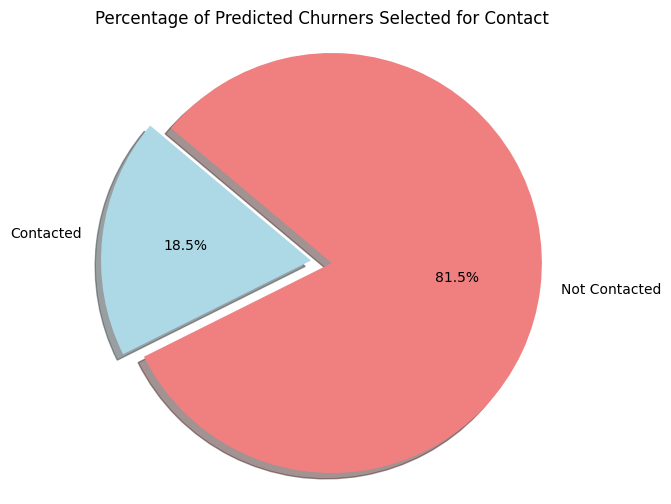

In [36]:
# Assuming a churn probability threshold of 0.5 to define churners
churners = churn_df[churn_df['churn_probability'] > 0.5]
churners_contacted = churners[churners['client_id'].isin(optimized_strategies['client_id'])]
percentage_contacted = len(churners_contacted) / len(churners) * 100

print(f"Percentage of churners selected for contact: {percentage_contacted:.2f}%")

# Number of churners not contacted
num_churners_not_contacted = len(churners) - len(churners_contacted)

# Data to plot
labels = 'Contacted', 'Not Contacted'
sizes = [len(churners_contacted), num_churners_not_contacted]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Predicted Churners Selected for Contact')
plt.show()

In [37]:
total_gain = results_df['gain'].sum()
total_cost = results_df['cost'].sum()
roi = (total_gain - total_cost) / total_cost * 100

print(f"Total Gain: €{total_gain:.2f}")
print(f"Total Cost: €{total_cost:.2f}")
print(f"ROI: {roi:.2f}%")

# By client type
results_by_type = results_df.groupby('quali_relation').agg({
    'gain': 'sum',
    'cost': 'sum'
}).assign(ROI=lambda x: (x['gain'] - x['cost']) / x['cost'] * 100)
print(results_by_type)


Total Gain: €96262947.35
Total Cost: €100000.00
ROI: 96162.95%
                          gain     cost            ROI
quali_relation                                        
Agreeable client  3.415275e+07  31626.0  107889.467917
Demanding client  3.158650e+07  33514.0   94148.663592
Difficult client  3.052370e+07  34860.0   87460.817886


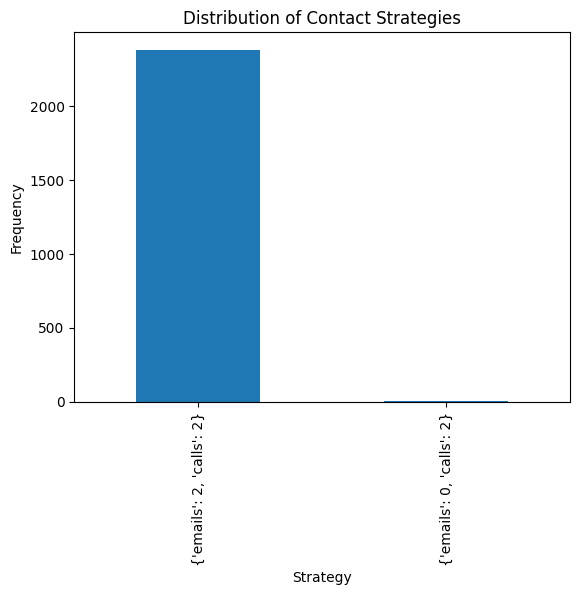

In [38]:
strategy_counts = results_df['method'].value_counts()
strategy_counts.plot(kind='bar')
plt.title('Distribution of Contact Strategies')
plt.xlabel('Strategy')
plt.ylabel('Frequency')
plt.show()


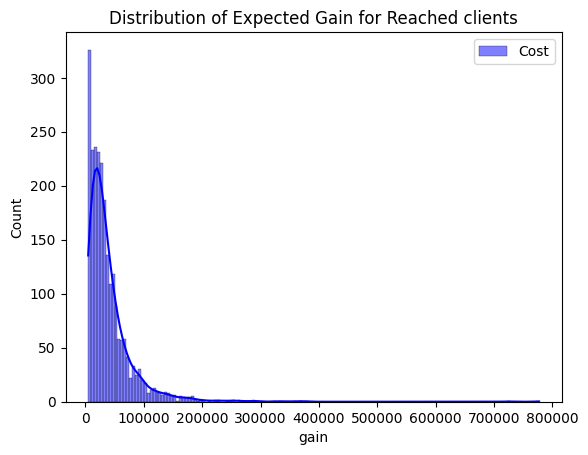

In [39]:
sns.histplot(results_df['gain'], kde=True, color='blue', label='Cost')
plt.title('Distribution of Expected Gain for Reached clients')
plt.legend()
plt.show()